<a href="https://colab.research.google.com/github/pranavkotak8/ML/blob/master/ML_Experiment9_J024_Pranav_Kotak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np

**1st Dataset**

In [ ]:
# 1st Dataset
#Connectionist Bench (Sonar, Mines vs. Rocks)
path='https://raw.githubusercontent.com/pranavkotak8/Datasets/master/sonar.csv'
df1=pd.read_csv(path)

In [ ]:
df1

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,

In [ ]:
# Finding the Missing Values
df1.isna().sum()/len(df1)

attribute_1     0.0
attribute_2     0.0
attribute_3     0.0
attribute_4     0.0
attribute_5     0.0
               ... 
attribute_57    0.0
attribute_58    0.0
attribute_59    0.0
attribute_60    0.0
Class           0.0
Length: 61, dtype: float64

In [ ]:
df1.info()  # No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

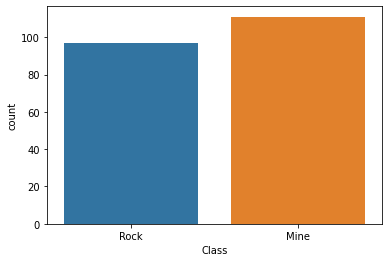

In [ ]:
# Lets check out the Target Column
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df1['Class'])
plt.show()

In [ ]:
# Normalizing the data
target=df1['Class']
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
target1=(ln.fit_transform(target))
df1.drop(columns={'Class'},inplace=True)
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
df1=pd.DataFrame(m.fit_transform(df1))

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.136431,0.156451,0.135677,0.035426,0.224956,0.237571,0.407468,0.340904,0.449282,0.285714,0.187154,0.197245,0.295667,0.038362,0.063096,0.214838,0.285048,0.272623,0.482222,0.443172,0.555544,0.496064,0.398962,0.544104,0.663012,0.605133,0.695766,0.802388,0.674412,0.345584,0.089918,0.247135,0.487661,0.777424,0.850363,0.849496,0.693309,0.594156,0.481973,0.286166,0.017371,0.339194,0.365317,0.548312,0.375462,0.190071,0.190330,0.402216,0.193337,0.392727,0.231076,0.027104,0.155844,0.435673,0.149660,0.417949,0.502841,0.185355,0.245179,0.060046
1,0.323009,0.221603,0.272011,0.150024,0.283033,0.666756,0.574405,0.755458,0.483045,0.394537,0.656316,0.925557,0.969483,0.775910,0.745611,0.944637,1.000000,0.883013,0.792131,0.766481,0.495363,0.391882,0.359648,0.376498,0.308402,0.251019,0.293098,0.255558,0.434152,0.150740,0.360327,0.285666,0.158248,0.225649,0.110770,0.413508,0.380932,0.070084,0.154860,0.201852,0.152171,0.064347,0.181172,0.209740,0.088285,0.027839,0.095980,0.222222,0.206461,0.073939,0.124502,0.108417,0.218182,0.111111,0.199546,0.479487,0.389205,0.105263,0.140496,0.087760
2,0.182153,0.246892,0.356110,0.243699,0.230028,0.585327,0.648810,0.819405,0.817859,0.869584,0.856940,1.000000,0.771556,0.520470,0.646805,0.688887,0.664180,0.745558,0.887334,0.852205,0.786467,0.666394,0.395253,0.349247,0.521619,0.164335,0.482088,0.849012,0.597808,0.841696,0.875204,0.521344,0.145437,0.264653,0.410044,0.298690,0.630330,0.662681,0.527514,0.501307,0.496468,0.309035,0.275314,0.286266,0.300114,0.024136,0.244114,0.222821,0.065623,0.128485,0.032869,0.319544,0.418182,0.248538,0.394558,0.615385,0.889205,0.368421,0.258953,0.166282
3,0.062684,0.070724,0.199737,0.034950,0.034999,0.071486,0.288149,0.269239,0.077447,0.164593,0.083936,0.257327,0.000000,0.205012,0.170328,0.200387,0.035644,0.198026,0.375131,0.354987,0.234928,0.354872,0.529088,0.471980,0.297131,0.486067,0.501628,0.230136,0.197443,0.313838,0.629755,0.779151,0.592565,0.348172,0.381508,0.295565,0.552919,0.876677,1.000000,0.985839,0.667169,0.604396,0.415104,0.412523,0.610606,0.501097,0.480804,0.471998,0.343766,0.356364,0.240040,0.161198,0.080519,0.409357,0.179138,0.176923,0.133523,0.093822,0.107438,0.256351
4,0.550885,0.282898,0.153088,0.079886,0.132640,0.147003,0.318182,0.531863,0.516659,0.621479,0.547710,0.544549,0.586152,0.398268,0.451098,0.525544,0.720858,0.604468,0.161793,0.425942,0.383221,0.416420,0.547526,0.528634,0.299283,0.150237,0.684316,1.000000,0.722200,0.437946,0.503651,0.567850,0.252441,0.081505,0.176741,0.413407,0.465012,0.294686,0.259013,0.251961,0.187493,0.291575,0.238847,0.108348,0.098379,0.072408,0.064650,0.025457,0.116103,0.055758,0.155378,0.032810,0.127273,0.277778,0.235828,0.028205,0.196023,0.102975,0.292011,0.203233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.126844,0.145735,0.050263,0.028293,0.082678,0.410642,0.539773,0.361411,0.333629,0.367653,0.399688,0.395223,0.300993,0.074353,0.177550,0.207409,0.246917,0.258390,0.162003,0.116010,0.381324,0.680912,0.800784,0.841512,0.889242,0.922899,0.998634,1.000000,0.807630,0.595078,0.605886,0.577735,0.386748,0.133545,0.064028,0.053226,0.067571,0.106894,0.137571,0.117974,0.097394,0.119658,0.255658,0.172507,0.128234,0.148793,0.275444,0.408206,0.433115,0.351515,0.202191,0.154066,0.241558,0.552632,0.061224,0.248718,0.176136,0.256293,0.528926,0.348730
204,0.227139,0.040720,0.092970,0.120304,0.175755,0.230046,0.258929,0.212348,0.141419,0.291863,0.396427,0.467321,0.403915,0.116428,0.120774,0.139630,0.160812,0.213403,0.171050,0.186109,0.290894,0.585830,0.820070,0.902162,0.988525,0.990307,0.942011,1.000000,0.907873,0.724300,0.785722,0.754100,0.506878,0.203392,0.072108,0.122681,0.0

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [ ]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,target1,test_size=0.2,random_state=seed)

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,X_train,y_train,cv=5,scoring='accuracy')

In [ ]:
np.mean(scores)

0.8130124777183602

In [ ]:
scores_sgd=cross_val_score(sgd,X_train,y_train,cv=5,scoring='accuracy')

In [ ]:
np.mean(scores_sgd)

0.7347593582887699

In [ ]:
# GridSearch CV on Logistic Regression
from sklearn.model_selection import GridSearchCV
gscv_log=GridSearchCV(logistic, {
                      'penalty': ['l1','l2','elasticnet'],
                      'C': [0.1,0.5,0.25,0.8,0.9,0.95,1.5,2.3,5.5],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'solver' : ['liblinear', 'saga']
                      },cv=3,return_train_score=False,n_jobs=-1)

In [ ]:
y_train.shape

(166,)

In [ ]:
gscv_log.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.25, 0.8, 0.9, 0.95, 1.5, 2.3, 5.5],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [ ]:
gscv_log.best_score_

0.8254329004329004

In [ ]:
gscv_log.best_params_

{'C': 5.5, 'class_weight': {0: 0.6, 1: 0.4}, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
gscv_log.best_index_

105

In [ ]:
# Accuracy on the Test Set
from sklearn.metrics import accuracy_score
y_test_pred = gscv_log.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.7619047619047619


In [ ]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_pred_rf = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.8333333333333334


In [ ]:
# GridSearch CV on Random Forest
gscv_rf= GridSearchCV( RandomForestClassifier(),{
                      'n_estimators':[1,10,15,20,52,60,100],
                       'criterion':['gini','entropy'],
                      'max_depth':[5,10,15,20,25,35,52,85,100],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'ccp_alpha':[0.20,0.05,1.5,2.5],
                       'bootstrap':[True,False]
},cv=5,return_train_score=False,n_jobs=-1)

In [ ]:
gscv_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [ ]:
gscv_rf.best_score_

0.837433155080214

In [ ]:
gscv_rf.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.05,
 'class_weight': {0: 0.5, 1: 0.5},
 'criterion': 'entropy',
 'max_depth': 52,
 'n_estimators': 20}

In [ ]:
y_test_pred_gridrf = gscv_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred_gridrf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.8571428571428571


In [ ]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
X_train.shape

(166, 60)

In [ ]:
y_train.shape

(166, 2)

In [ ]:
# Performing Neural Network on X_train and Y_train
model=Sequential()
model.add(Dense(units=580, activation='relu', input_dim=60))
model.add(Dense(units=2800, activation='relu'))
model.add(Dense(units=1041, activation='relu'))
model.add(Dense(units=2041))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
2/2 [==============================] - 0s 219ms/step - loss: 0.7039 - accuracy: 0.4697 - val_loss: 0.7811 - val_accuracy: 0.4412
Epoch 2/100
2/2 [==============================] - 0s 63ms/step - loss: 0.7399 - accuracy: 0.5000 - val_loss: 0.7158 - val_accuracy: 0.4412
Epoch 3/100
2/2 [==============================] - 0s 77ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.7043 - val_accuracy: 0.4412
Epoch 4/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6742 - accuracy: 0.5000 - val_loss: 0.6854 - val_accuracy: 0.4706
Epoch 5/100
2/2 [==============================] - 0s 69ms/step - loss: 0.6469 - accuracy: 0.6667 - val_loss: 0.6724 - val_accuracy: 0.5588
Epoch 6/100
2/2 [==============================] - 0s 70ms/step - loss: 0.6670 - accuracy: 0.5758 - val_loss: 0.6795 - val_accuracy: 0.5588
Epoch 7/100
2/2 [==============================] - 0s 79ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6689 - val_accuracy: 0.5588
Epoch 8/100
2/2 [==

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 10ms/step - loss: 2.1925 - accuracy: 0.7381


[2.1925196647644043, 0.738095223903656]

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**2nd Dataset**

In [ ]:
# 2nd Dataset
names=['Wife  age','Wife education','Husband education','Number of children ever born','Wife religion','Wife now working?','Husband occupation','Standard-of-living index','Media exposure','Contraceptive method used']
df3=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data',names=names)

 Attribute Information:

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working?            (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use,2=Long-term,3=Short-term
                                                        
                                                        

In [ ]:
df3

,Wife age,Wife education,Husband education,Number of children ever born,Wife religion,Wife now working?,Husband occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [ ]:
# Checking out for the Missing values
df3.isna().sum()/len(df3)

Wife  age                       0.0
Wife education                  0.0
Husband education               0.0
Number of children ever born    0.0
Wife religion                   0.0
Wife now working?               0.0
Husband occupation              0.0
Standard-of-living index        0.0
Media exposure                  0.0
Contraceptive method used       0.0
dtype: float64

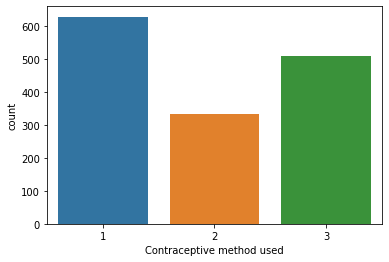

In [ ]:
sns.countplot(df3['Contraceptive method used'])
plt.show()

In [ ]:
target_3=df3['Contraceptive method used']
df3.drop(columns={'Contraceptive method used'},inplace=True)
df3=pd.DataFrame(m.fit_transform(df3))

In [ ]:
df3

,0,1,2,3,4,5,6,7,8
0,0.242424,0.333333,0.666667,0.1875,1.0,1.0,0.333333,0.666667,0.0
1,0.878788,0.000000,0.666667,0.6250,1.0,1.0,0.666667,1.000000,0.0
2,0.818182,0.333333,0.666667,0.4375,1.0,1.0,0.666667,1.000000,0.0
3,0.787879,0.666667,0.333333,0.5625,1.0,1.0,0.666667,0.666667,0.0
4,0.606061,0.666667,0.666667,0.5000,1.0,1.0,0.666667,0.333333,0.0
...,...,...,...,...,...,...,...,...,...
1468,0.515152,1.000000,1.000000,0.1250,1.0,0.0,0.333333,1.000000,0.0
1469,0.515152,1.000000,1.000000,0.1875,1.0,1.0,0.000000,1.000000,0.0
1470,0.696970,0.666667,0.666667,0.5000,1.0,0.0,0.000000,1.000000,0.0
1471,0.515152,0.666667,0.666667,0.2500,1.0,0.0,0.333333,0.333333,0.0


In [ ]:
target_3=ln.fit_transform(target_3)

In [ ]:
# Splitting into trainset and testset in the ratio 80:20
seed=8
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(df3,target_3,test_size=0.2,random_state=seed)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_log_3=cross_val_score(logistic,X_train2,y_train2,cv=3,scoring='accuracy')

In [ ]:
np.mean(scores_log_3)

0.5118744698897371

In [ ]:
scores_sgd_3=cross_val_score(sgd,X_train2,y_train2,cv=3,scoring='accuracy')

In [ ]:
np.mean(scores_sgd_3)

0.4838997940142978

In [ ]:
# GridSearch CV on Logistic Regression
from sklearn.model_selection import GridSearchCV
gscv_log=GridSearchCV(logistic, {
                      'penalty': ['l1','l2','elasticnet'],
                      'C': [0.1,0.5,0.25,0.8,0.9,0.95,1.5,2.3,5.5],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'solver' : ['liblinear', 'saga']
                      },cv=3,return_train_score=False,n_jobs=-1)

In [ ]:
gscv_log.fit(X_train2,y_train2)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.25, 0.8, 0.9, 0.95, 1.5, 2.3, 5.5],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [ ]:
gscv_log.best_score_

0.5203713801042045

In [ ]:
gscv_log.best_params_

{'C': 5.5,
 'class_weight': {0: 0.5, 1: 0.5},
 'penalty': 'l2',
 'solver': 'liblinear'}

In [ ]:
# Accuracy on the Test Set
from sklearn.metrics import accuracy_score
y_test_pred2 = gscv_log.predict(X_test2)
accuracy_test = accuracy_score(y_test2, y_test_pred2)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.4915254237288136


In [ ]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [ ]:
y_train2=to_categorical(y_train2)
y_test2=to_categorical(y_test2)

In [ ]:
X_train2.shape

(1178, 9)

In [ ]:
y_train2.shape

(1178, 3)

In [ ]:
# Performing Neural Network on X_train and Y_train
model1=Sequential()
model1.add(Dense(units=580, activation='relu', input_dim=9))
model1.add(Dense(units=2800, activation='relu'))
model1.add(Dense(units=1041, activation='relu'))
#model1.add(Dense(units=2041))
#model1.add(LeakyReLU(alpha=0.05))
model1.add(Dense(units=3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history2=model1.fit(X_train2, y_train2, epochs=100,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/100
8/8 [==============================] - 1s 104ms/step - loss: 1.0578 - accuracy: 0.4119 - val_loss: 0.9905 - val_accuracy: 0.4746
Epoch 2/100
8/8 [==============================] - 1s 84ms/step - loss: 0.9884 - accuracy: 0.4820 - val_loss: 0.9909 - val_accuracy: 0.4619
Epoch 3/100
8/8 [==============================] - 1s 86ms/step - loss: 0.9627 - accuracy: 0.5180 - val_loss: 0.9654 - val_accuracy: 0.4958
Epoch 4/100
8/8 [==============================] - 1s 86ms/step - loss: 0.9208 - accuracy: 0.5626 - val_loss: 1.0292 - val_accuracy: 0.5042
Epoch 5/100
8/8 [==============================] - 1s 85ms/step - loss: 0.9097 - accuracy: 0.5510 - val_loss: 0.9778 - val_accuracy: 0.5085
Epoch 6/100
8/8 [==============================] - 1s 88ms/step - loss: 0.9168 - accuracy: 0.5594 - val_loss: 0.9868 - val_accuracy: 0.4958
Epoch 7/100
8/8 [==============================] - 1s 83ms/step - loss: 0.9083 - accuracy: 0.5648 - val_loss: 0.9816 - val_accuracy: 0.4915
Epoch 8/100
8/8 [==

In [ ]:
model1.evaluate(X_test2,y_test2)

10/10 [==============================] - 0s 8ms/step - loss: 2.9320 - accuracy: 0.4407


[2.9320480823516846, 0.4406779706478119]

**3rd Dataset**

In [ ]:
# 3rd Dataset
names1=['Train or Test','Speaker Number','Sex','Feature 0','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9','Feature 10','Class']
df4=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/vowel/vowel-context.data',names=names1,sep=' ')

In [ ]:
df4

,Train or Test,Speaker Number,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,Class
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,NaN,0.0
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,NaN,1.0
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,NaN,2.0
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,NaN,3.0
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,NaN,6.0
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,NaN,7.0
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,NaN,8.0
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,NaN,9.0


In [ ]:
df4.drop(columns={'Feature 10'},inplace=True)

In [ ]:
df4

,Train or Test,Speaker Number,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Class
0,0,0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814,0.0
1,0,0,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488,1.0
2,0,0,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049,2.0
3,0,0,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795,3.0
4,0,0,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1,14,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147,6.0
986,1,14,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301,7.0
987,1,14,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500,8.0
988,1,14,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390,9.0


In [ ]:
# Dividing into train and test
train=df4[df4['Train or Test']==0]
test=df4[df4['Train or Test']==1]

In [ ]:
# Dropping the 'Train or Test' and 'Speaker Number' Column as it is not of much importance for analysis
y_train=train['Class']
y_test=test['Class']
train.drop(columns={'Train or Test','Speaker Number','Class'},inplace=True)
test.drop(columns={'Train or Test','Speaker Number','Class'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train

,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,0,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,0,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,0,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,0,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...,...
523,1,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
524,1,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
525,1,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
526,1,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304


In [ ]:
test

,Sex,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
528,0,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
529,0,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
530,0,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
531,0,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
532,0,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471
...,...,...,...,...,...,...,...,...,...,...,...
985,1,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
986,1,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
987,1,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
988,1,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390


In [ ]:
y_train.replace(np.nan,10,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
y_test.replace(np.nan,10,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
train.isna().sum()/len(train)

Sex          0.0
Feature 0    0.0
Feature 1    0.0
Feature 2    0.0
Feature 3    0.0
Feature 4    0.0
Feature 5    0.0
Feature 6    0.0
Feature 7    0.0
Feature 8    0.0
Feature 9    0.0
Class        0.0
dtype: float64

In [ ]:
test.isna().sum()/len(test)

Sex          0.0
Feature 0    0.0
Feature 1    0.0
Feature 2    0.0
Feature 3    0.0
Feature 4    0.0
Feature 5    0.0
Feature 6    0.0
Feature 7    0.0
Feature 8    0.0
Feature 9    0.0
Class        0.0
dtype: float64

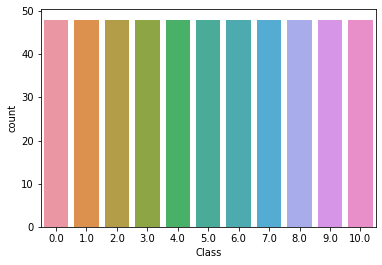

In [ ]:
# Checking the distribution of the target class
import seaborn as sns
sns.countplot(y_train)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
logistic=linear_model.LogisticRegression()
sgd=linear_model.SGDClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logistic,train,y_train,cv=5,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
np.mean(scores)

0.6800359389038634

In [ ]:
scores_sgd=cross_val_score(sgd,train,y_train,cv=5,scoring='accuracy')

In [ ]:
np.mean(scores_sgd)

0.4586163522012579

In [ ]:
# GridSearch CV on Logistic Regression
from sklearn.model_selection import GridSearchCV
gscv_log=GridSearchCV(logistic, {
                      'penalty': ['l1','l2','elasticnet'],
                      'C': [0.1,0.5,0.25,0.8,0.9,0.95,1.5,2.3,5.5],
                      'class_weight' : [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}],
                      'solver' : ['liblinear', 'saga']
                      },cv=5,return_train_score=False,n_jobs=-1)

In [ ]:
gscv_log.fit(train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.25, 0.8, 0.9, 0.95, 1.5, 2.3, 5.5],
                         'class_weight': [{0: 0.5, 1: 0.5}, {0: 0.6, 1: 0.4}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [ ]:
gscv_log.best_score_

0.6721832884097034

In [ ]:
# Accuracy on the Test Set
from sklearn.metrics import accuracy_score
y_test_pred = gscv_log.predict(test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.7359307359307359


In [ ]:
# Performing Random Forest on the Dataset
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_pred_rf = rf.predict(test)
accuracy_test = accuracy_score(y_test, y_test_pred_rf)
print("Accuracy:"+str(accuracy_test))

Accuracy:0.9826839826839827


In [ ]:
# Performing Neural Networks on the Dataset
# Importing the Necessary Libraries for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
train.shape

(528, 12)

In [ ]:
y_train.shape

(528, 11)

In [ ]:
# Performing Neural Network on train and y_train
model=Sequential()
model.add(Dense(units=58, activation='relu', input_dim=12))
model.add(Dense(units=280, activation='relu'))
model.add(Dense(units=101, activation='relu'))
model.add(Dense(units=21))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(units=11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history1=model.fit(train, y_train, epochs=200,validation_split=0.2, verbose=1,batch_size=128)

Epoch 1/200
4/4 [==============================] - 0s 35ms/step - loss: 2.3675 - accuracy: 0.1635 - val_loss: 2.1354 - val_accuracy: 0.1792
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 2.0107 - accuracy: 0.2749 - val_loss: 1.9649 - val_accuracy: 0.2170
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 1.8166 - accuracy: 0.3175 - val_loss: 1.9921 - val_accuracy: 0.2547
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 1.7330 - accuracy: 0.3246 - val_loss: 1.7632 - val_accuracy: 0.3396
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5694 - accuracy: 0.4502 - val_loss: 1.7659 - val_accuracy: 0.2925
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.4597 - accuracy: 0.4905 - val_loss: 1.5797 - val_accuracy: 0.4717
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3302 - accuracy: 0.5403 - val_loss: 1.6519 - val_accuracy: 0.3491
Epoch 8/200
4/4 [=========

In [ ]:
model.evaluate(test,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 1.9698 - accuracy: 0.7165


[1.96980881690979, 0.7164502143859863]

**4th Dataset**

In [ ]:
from sklearn.datasets import fetch_covtype
forest = fetch_covtype()

In [ ]:
forest=pd.Series(forest)
forest

data      [[2596.0, 51.0, 3.0, 258.0, 0.0, 510.0, 221.0,...
target    [5, 5, 2, 2, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 5, ...
DESCR     .. _covtype_dataset:\n\nForest covertypes\n---...
dtype: object

In [ ]:
forest_df=forest['data']
forest_target=forest['target']

In [ ]:
forest_df=pd.DataFrame(forest_df)
forest_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Checking for NA values
forest_df.isna().sum()*100/len(forest_df)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
dtype: float64

In [ ]:
forest_target=pd.DataFrame(forest_target)
forest_df['Target']=forest_target

In [ ]:
# Splitting the Data into Train and Test set
train, validate, test = np.split(forest_df.sample(frac=1), [int(.6*len(forest_df)), int(.8*len(forest_df))])
y_train=train['Target']
y_val=validate['Target']
y_test=test['Target']
train.drop(columns={'Target'},axis='columns',inplace=True)
validate.drop(columns={'Target'},axis='columns',inplace=True)
test.drop(columns={'Target'},axis='columns',inplace=True)

In [ ]:
# Scaling the Data
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
train=pd.DataFrame(s.fit_transform(train))
test=pd.DataFrame(s.fit_transform(test))
validate=pd.DataFrame(s.fit_transform(validate))

In [ ]:
# Preprocessing for Neural Networks
from keras import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense
import tensorflow
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_train=pd.DataFrame(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [ ]:
# NN Model for Forest Dataset
model=Sequential()
model.add(Dense(units=104, activation='relu', input_dim=54))
model.add(Dense(units=280, activation='relu'))
model.add(Dense(units=380, activation='relu'))
model.add(Dense(units=480, activation='relu'))
model.add(Dense(units=580, activation='relu'))
model.add(Dense(units=8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history=model.fit(train, y_train, epochs=20, verbose=1,batch_size=50,validation_data=(validate,y_val))

Epoch 1/20
6973/6973 [==============================] - 20s 3ms/step - loss: 0.5689 - accuracy: 0.7548 - val_loss: 0.4593 - val_accuracy: 0.8074
Epoch 2/20
6973/6973 [==============================] - 20s 3ms/step - loss: 0.4105 - accuracy: 0.8258 - val_loss: 0.3723 - val_accuracy: 0.8414
Epoch 3/20
6973/6973 [==============================] - 19s 3ms/step - loss: 0.3422 - accuracy: 0.8557 - val_loss: 0.3260 - val_accuracy: 0.8630
Epoch 4/20
6973/6973 [==============================] - 20s 3ms/step - loss: 0.3024 - accuracy: 0.8726 - val_loss: 0.2912 - val_accuracy: 0.8794
Epoch 5/20
6973/6973 [==============================] - 20s 3ms/step - loss: 0.2741 - accuracy: 0.8849 - val_loss: 0.2826 - val_accuracy: 0.8837
Epoch 6/20
6973/6973 [==============================] - 19s 3ms/step - loss: 0.2552 - accuracy: 0.8930 - val_loss: 0.2448 - val_accuracy: 0.8998
Epoch 7/20
6973/6973 [==============================] - 20s 3ms/step - loss: 0.2399 - accuracy: 0.9001 - val_loss: 0.2479 - val_ac

In [ ]:
model.evaluate(test,y_test)

3632/3632 [==============================] - 7s 2ms/step - loss: 0.1867 - accuracy: 0.9292


[0.18670499324798584, 0.9291842579841614]

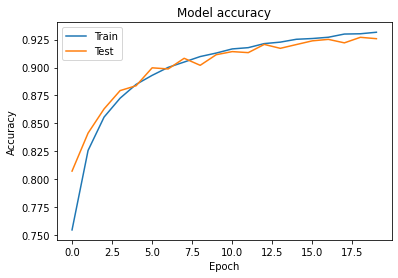

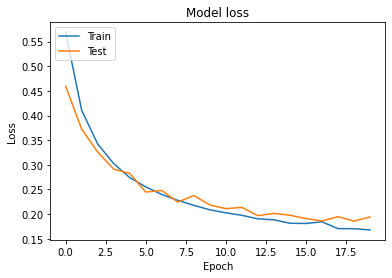

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()